# Lab 2

## Zad 1.

In [15]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

println(decode(Float16(1/3)))
println(decode(Float32(1/3)))
println(decode(Float64(1/3)))

a = Float16(1/3)
println(decode(Float64(a)))

println("Wartość 1/3 jako Float64: ", Float64(1/3))
println("Wartość 1/3 jako Float16 rzutowana na Float64: ", Float64(a))

('0', "01101", "0101010101")
('0', "01111101", "01010101010101010101011")
('0', "01111111101", "0101010101010101010101010101010101010101010101010101")
('0', "01111111101", "0101010101000000000000000000000000000000000000000000")
Wartość 1/3 jako Float64: 0.3333333333333333
Wartość 1/3 jako Float16 rzutowana na Float64: 0.333251953125


Przy inicjalizacji liczby 1/3 jako Float16, a odczytując ją jako Float64 to niezainizjalizowane bity przy rzutowaniu otrzymuja
wartość 0 (rzutowanie jest niedokładne).

## Zad 2.

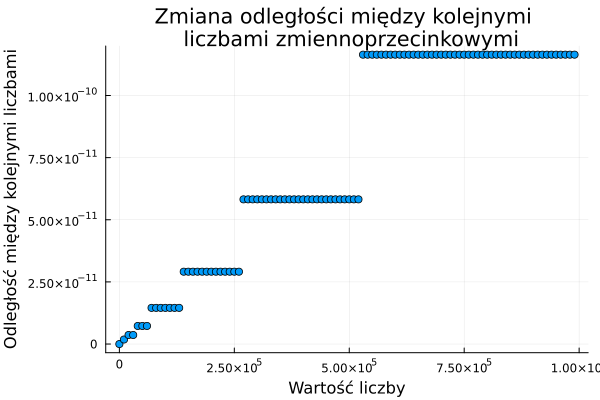

In [16]:
using Plots

scatter(eps, 1.0:10000:1000000.0,
        xlabel = "Wartość liczby",
        ylabel = "Odległość między kolejnymi liczbami",
        title = "Zmiana odległości między kolejnymi \n liczbami zmiennoprzecinkowymi",
        legend=false)


## Zad 3.

```C
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <gsl/gsl_math.h>

int main ()
{
  gsl_ieee_env_setup ();
  float a = 1e-32;
  while (a > 0){
    a = a/(2.0);
    gsl_ieee_printf_float(&a);
    printf("\n");
  }
  return 0;
}

// gcc -o program main.c -lgsl -lgslcblas -lm

Wynik:
 1.10011111011000100011111*2^-108
 1.10011111011000100011111*2^-109
 1.10011111011000100011111*2^-110
 1.10011111011000100011111*2^-111
 1.10011111011000100011111*2^-112
 1.10011111011000100011111*2^-113
 1.10011111011000100011111*2^-114
 1.10011111011000100011111*2^-115
 1.10011111011000100011111*2^-116
 1.10011111011000100011111*2^-117
 1.10011111011000100011111*2^-118
 1.10011111011000100011111*2^-119
 1.10011111011000100011111*2^-120
 1.10011111011000100011111*2^-121
 1.10011111011000100011111*2^-122
 1.10011111011000100011111*2^-123
 1.10011111011000100011111*2^-124
 1.10011111011000100011111*2^-125
 1.10011111011000100011111*2^-126
 0.11001111101100010010000*2^-126
 0.01100111110110001001000*2^-126
 0.00110011111011000100100*2^-126
 0.00011001111101100010010*2^-126
 0.00001100111110110001001*2^-126
 0.00000110011111011000100*2^-126
 0.00000011001111101100010*2^-126
 0.00000001100111110110001*2^-126
 0.00000000110011111011000*2^-126
 0.00000000011001111101100*2^-126
 0.00000000001100111110110*2^-126
 0.00000000000110011111011*2^-126
 0.00000000000011001111110*2^-126
 0.00000000000001100111111*2^-126
 0.00000000000000110100000*2^-126
 0.00000000000000011010000*2^-126
 0.00000000000000001101000*2^-126
 0.00000000000000000110100*2^-126
 0.00000000000000000011010*2^-126
 0.00000000000000000001101*2^-126
 0.00000000000000000000110*2^-126
 0.00000000000000000000011*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0
 ```

Na podstawie podanych wyników można zauważyć, że mantysa przestaje być znormalizowana w momencie, gdy cecha osiąga najniższą możliwą wartość w standardzie IEEE 754 (czyli -126 w przypadku pojedynczej precyzji). Po tym punkcie kolejne liczby mają mantysy reprezentowane w postaci subnormalnej (denormalizowanej), co oznacza, że bit przed przecinkiem nie jest już zawsze ustawiony na 1. Mantysa denormalizuje się po przekroczeniu zakresu cechy (cecha może przyjąć wartości od -126 do 127).

## Zad 4.

Jako algorytm niestabilny numerycznie wybrałem algorytm rozwiązujący równanie kwadratowe, w którym wymuszone będzie odejmowanie bardzo bliskich sobie liczb. Dla wzoru: "x^2 + bx + c" z parametrami b,c równymi:

In [17]:
b = Float16(-10.833) 
c = Float16(0.02)

Float16(0.02)

In [18]:
delta = sqrt(b^2 - 4*c)

Float16(10.836)

In [19]:
x1 = (-b-delta)/2
x2 = (-b+delta)/2

println(x1)
println(x2)

0.0
10.836


x1 otrzymał niepoprawną wartość ponieważ (-p-delta) =/= 0.0.

In [20]:
println(bitstring(-b))
println(bitstring(delta))

0100100101101011
0100100101101011


Obie wartości mają taką samą reprezentacje bitową co tłumaczyło by wynik różnicy oraz wynik x1 = 0.0. Wystąpił tu błąd rodzaju __cancellation__: za mała dokładność reprezentacji liczb (brak kolejnych miejsc mantysy). Zauważmy jednak, że drugi z pierwiastków ze względu na dodawanie nie jest obarczony tym błędem. Wykorzystajmy zatem wzór Viet'a do wyliczenia pierwiastka obarczonego błędem:

In [21]:
x1 = c/x2

Float16(0.001846)

Otrzymany wynik bardziej pokrywa się z wyliczeniami ręcznymi. Numeryczna niestabilność wynika tu wyłącznie z góry narzuconej dokładności.